# Music Genre Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
audio_recording = '/Users/nathan/Documents/Portfolio/Projects/Music Artist Detection/pop.00004.wav'
data, sr = librosa.load(audio_recording, duration = 10)

Text(0.5, 1.0, 'Envelope view')

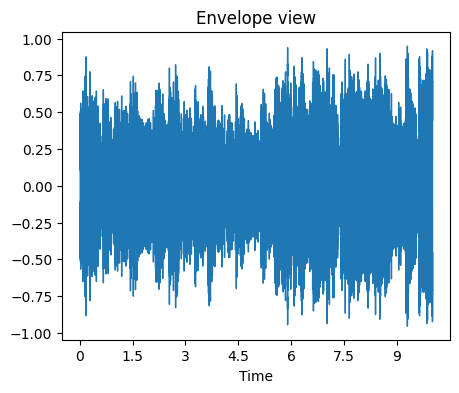

In [34]:
plt.figure(figsize = (5,4))
librosa.display.waveshow(data, sr=sr)
plt.title('Envelope view')

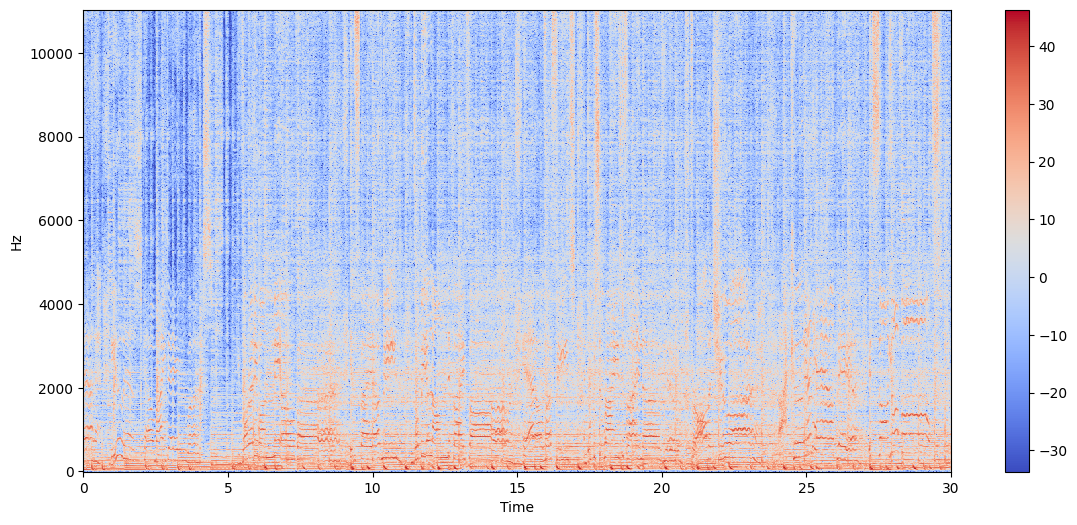

In [103]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (14,6))
librosa.display.specshow(stft_db, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

In [15]:
# import file MAC
df = pd.read_csv(r"/Users/nathan/Documents/Portfolio/Projects/Music Artist Detection/features_3_sec.csv")

In [2]:
# import file PC
df = pd.read_csv(r'C:\Users\natha\Portfolio Projects\Projects\Music Artist Detection\features_3_sec.csv')

In [16]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Meanings\
stft = short-time Fourier transform\
mfcc = Mel-frequency cepstrum

In [17]:
df.shape

(9990, 60)

In [18]:
# drop file name 
df1 = df.drop('filename', axis = 1)

In [19]:
df1.columns.values

array(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var',
       'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'harmony_mean', 'harmony_var',
       'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean',
       'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
       'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
       'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 

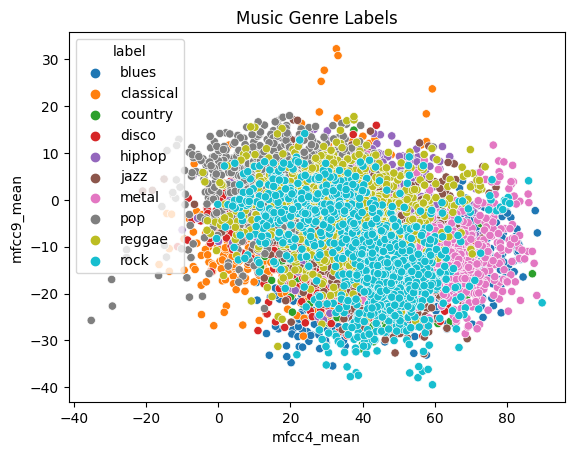

In [20]:
ax = sns.scatterplot(data = df, x = 'mfcc4_mean', y = 'mfcc9_mean', hue = 'label')
ax.set(title = 'Music Genre Labels')
plt.show()

## Feature Engineering

In [21]:
# getting labels and converting 
labels = df1.iloc[:, -1]
convert = LabelEncoder()
y = convert.fit_transform(labels)
y

array([0, 0, 0, ..., 9, 9, 9])

In [22]:
# scale inputs
X = df1.iloc[:,:-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# splitting data to train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 2023)

## Modelling

In [24]:
# SVM, KNN, Feed-Forward Neural Network, CNN
# accuracy score, RMSE

In [25]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras import layers, models

### Support Vector Machine 

In [13]:
# fitting  multi-class support vector machine
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')
clf.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [14]:
# predictions and metrics
y_pred = clf.predict(X_test)
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred)**0.5)

accuracy score:  0.8468468468468469
RMSE:  1.8205258345638258


In [45]:
perm_importance = permutation_importance(clf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

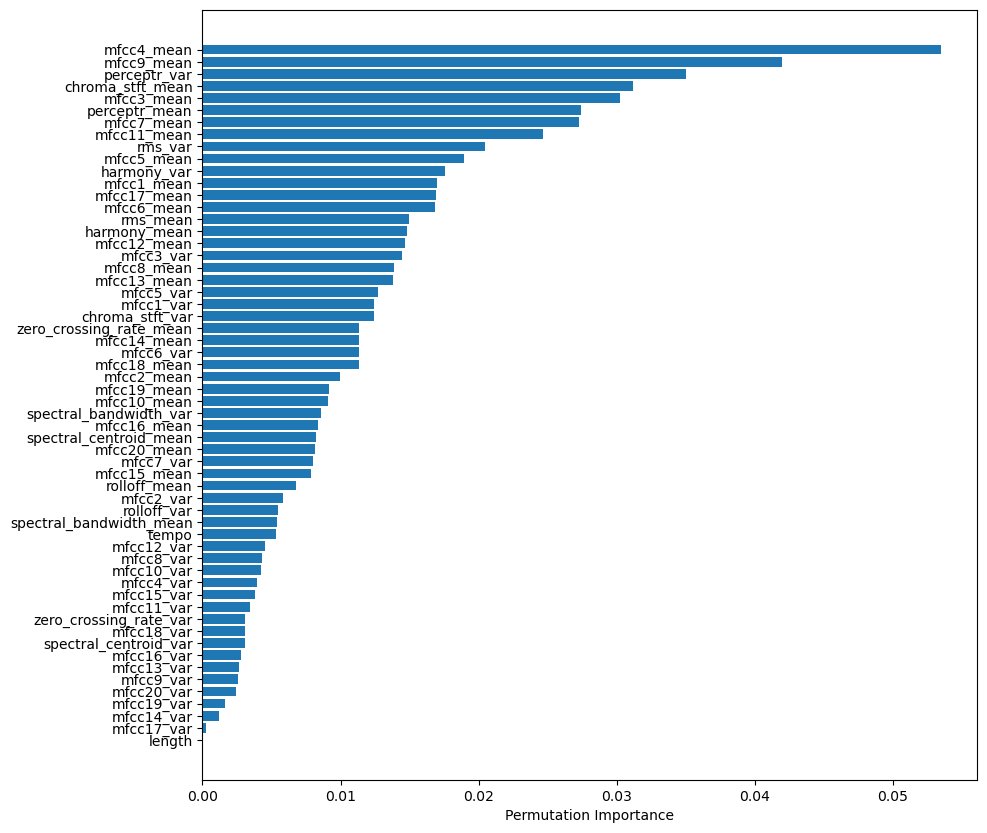

In [52]:
feature_names = df1.columns.values
features = np.array(feature_names)

plt.rcParams["figure.figsize"] = (10,10)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### KNN

In [15]:
# fitting KNN
knn = KNeighborsClassifier(n_neighbors = 5)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [16]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [17]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [18]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 89.80%


In [19]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
knn_test_score = knn.score(X_test,y_test)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(knn_test_score) )

Accuracy for our testing dataset with tuning is : 89.86%


### Feed Forward Neural Network

In [26]:
X_train.shape

(6993, 58)

In [27]:
FNN = models.Sequential()
FNN.add(layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)))
FNN.add(layers.Dropout(0.2))
FNN.add(layers.Dense(256, activation = 'relu'))
FNN.add(layers.Dropout(0.2))
FNN.add(layers.Dense(128, activation = 'relu'))
FNN.add(layers.Dropout(0.2))
FNN.add(layers.Dense(64, activation = 'relu'))
FNN.add(layers.Dropout(0.2))
FNN.add(layers.Dense(10, activation = 'softmax'))

In [28]:
FNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [29]:
FNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',\
              metrics = ['accuracy'])
history = FNN.fit(X_train,y_train, epochs = 100, validation_data= (X_test,y_test))

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 1.4297 - accuracy: 0.4972 - val_loss: 0.9576 - val_accuracy: 0.6633
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9645 - accuracy: 0.6671 - val_loss: 0.7429 - val_accuracy: 0.7491
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.7850 - accuracy: 0.7313 - val_loss: 0.6548 - val_accuracy: 0.7838
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.7689 - val_loss: 0.5803 - val_accuracy: 0.8045
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.8018 - val_loss: 0.5414 - val_accuracy: 0.8182
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.8221 - val_loss: 0.4663 - val_accuracy: 0.8425
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.8466 - val_loss: 0.4562 - val_accuracy: 0.8515

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.429652,0.497211,0.957586,0.663330,0
1,0.964459,0.667096,0.742911,0.749082,1
2,0.784994,0.731303,0.654810,0.783784,2
3,0.675477,0.768912,0.580343,0.804471,3
4,0.574739,0.801802,0.541415,0.818151,4


<Axes: xlabel='epoch', ylabel='val_loss'>

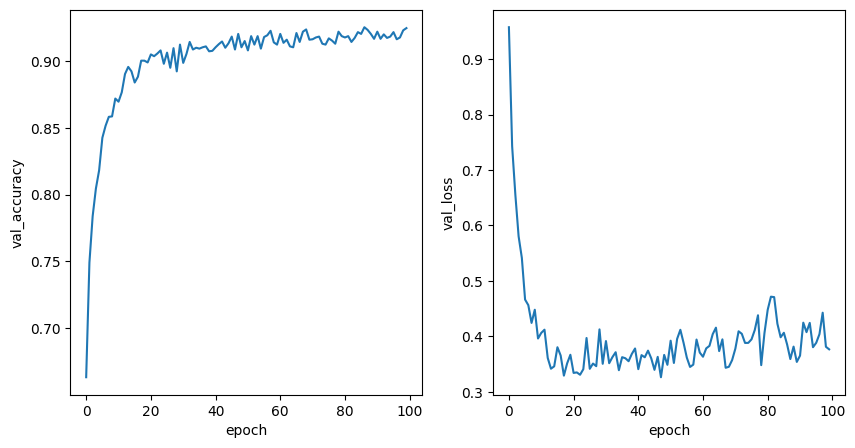

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.lineplot(data=hist, x='epoch', y='val_accuracy', ax=ax[0])
sns.lineplot(data=hist, x='epoch', y='val_loss', ax=ax[1])

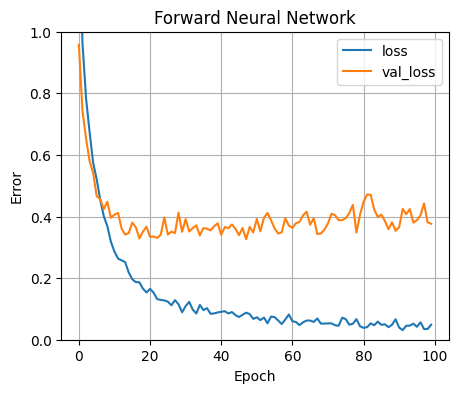

In [35]:
plt.figure(figsize = (5,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 1])
plt.title('Forward Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

## Model Selection: Neural Network

In [49]:
# neural network highest test set accuracy
y_pred = FNN.predict(X_test)

94/94 [==============================] - 0s 498us/step


In [51]:
y_pred = np.argmax(y_pred, axis=1)

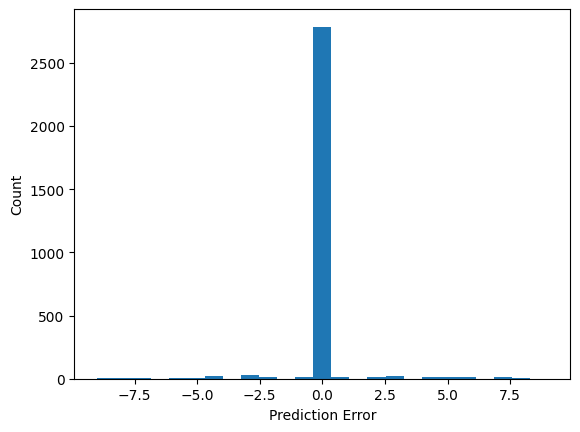

In [52]:
error = y_pred - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [70]:
y_pred_label = convert.inverse_transform(y_pred)
y_test_label = convert.inverse_transform(y_test)

In [72]:
df = pd.DataFrame(data = {'y_test':y_test_label,'y_pred':y_pred_label})
df['diff'] = df['y_test'] == df['y_pred']

In [73]:
wrong_pred = df[df['diff'] == False]['y_test'].value_counts().reset_index().sort_values(by = 'count')

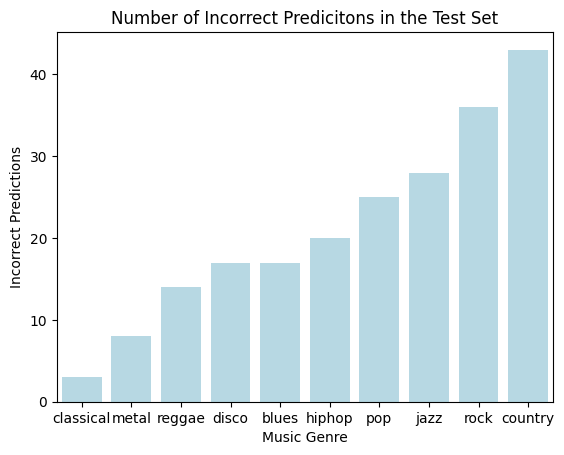

In [84]:
ax = sns.barplot(data=wrong_pred, x='y_test', y='count', color = '#AFDCEB')
ax.set(xlabel='Music Genre', ylabel='Incorrect Predictions', title = 'Number of Incorrect Predicitons in the Test Set')
plt.show()

In [86]:
y_test.shape

(2997,)

In [87]:
wrong_pred['percentage'] = 100*wrong_pred['count']/2997
wrong_pred.head()

,y_test,count,percentage
9,classical,3,0.100100
8,metal,8,0.266934
7,reggae,14,0.467134
5,disco,17,0.567234
6,blues,17,0.567234


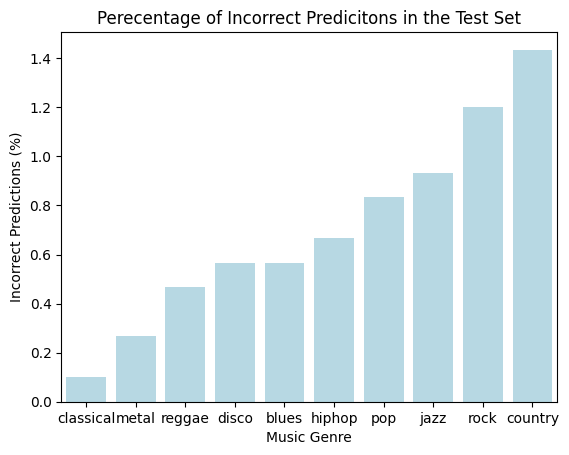

In [89]:
ax = sns.barplot(data=wrong_pred, x='y_test', y='percentage', color = '#AFDCEB')
ax.set(xlabel='Music Genre', ylabel='Incorrect Predictions (%)', title = 'Perecentage of Incorrect Predicitons in the Test Set')
plt.show()